shape x:(185, 15) / y: (185,)
train_x.shape = (185, 15, 1)
train_y.shape = (185,)
Epoch 1/1000
6/6 [==============================] - 3s 5ms/step - loss: 0.0874
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0499
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0249
Epoch 4/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 5/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 6/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 7/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 8/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 9/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 10/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 11/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 12/1000
6/6 [============================

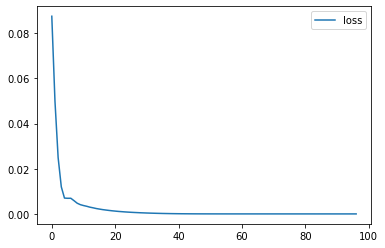

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

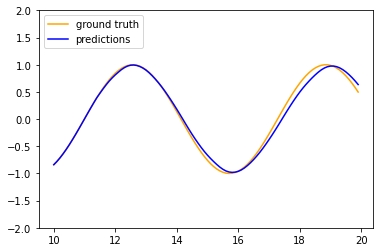

In [1]:
# sin 곡선 예측 RNN 모델 사용 
import numpy as np 
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN 

# time step 만큼 시퀀스 데이터 분리 
def split_sequence(sequence, step): 
    x, y = list(), list() 
    
    for i in range(len(sequence)): 
        end_idx = i + step 
        if end_idx > len(sequence) - 1:
            break 
        
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx] 
        x.append(seq_x) 
        y.append(seq_y) 
    return np.array(x), np.array(y)

# sin 함수 학습 데이터 
# -10 에서 10 사이 x축 범위를 가지는 sin() 함수 값을 0.1 단위로 증가 시켜 train_y 리스트에 저장.
# train_y 리스트는 RNN 모델 학습에 필요한 학습 데이터 셋 
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x] 

# 하이퍼파라미터
# RNN모델 사용하는 입력 시퀀스 길이(n_estimators) 15정의. n_estimators 만큼 RNN 메모리 쉘이 생성.
# 입력 벡터 차원 크기 n_features 는 1 
n_timesteps = 15
n_features = 1

# 시퀀스 나누기 
# train_x.shape => (samples, timesteps) 
# train_y.shape => (samples) 
# RNN모델 입력 시퀀스를 만들기 위해 split_sequence() 함수 호출
# sin파형의 학습 데이터가 들어 있는 train_y 리스트에서 n_timesteps 만큰 나눠서 입력 시퀀스를 생성 
# split_sequence() 함수 내부 - 입력인자 넘어온 리스트 데이터를 순차적으로 step 크기 만큼 나눠 RNN 모델 사용될 입력 시퀀스(x) 와 출력값(y) 넘파이 배열로 만듦
train_x, train_y = split_sequence(train_y, step=n_timesteps) 
print("shape x:{} / y: {}".format(train_x.shape, train_y.shape)) 

# RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경 
# reshape from [samples, timesteps] into [samples, timesteps, features] 
# 케라스에서 RNN 계층 사용하려면 3차원 텐서 형태여야함. 
# 2차원인 (samples, time step) 인 train_x 를 RNN 모델의 입력 데이터 형상에 맞게 3차원(batch_size, time step, input length) 형태로 변환
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

# RNN 모델 정의 
# sin 파형 데이터셋을 학습하기 위한 RNN계층 정의한 후 모델을 생성
# SimpleRNN 계층 1개와 출력 위한 Dense 계층 1개 구성
# SimpleRNN(units=RNN계층 전체 뉴런 수, return_sequence=RNN은닉상탯값 출력 여부 결정, False=마지막 시점 메모리 셀에서만 결과 출력, input_shape=모델 입력 데이터 형상)
model = Sequential() 
model.add(SimpleRNN(units=10,
                    return_sequences=False,
                    input_shape=(n_timesteps,n_features)))
model.add(Dense(1)) 
model.compile(optimizer='adam', loss='mse') 

# 모델 학습 
# 케라스 fit() 함수 이용 학습.
# fit(데이터셋, 에포크값) 
# 오버피팅 방지 EarlyStopping 콜백 객체 사용 (patience=5 성능 개선 없을시  5만 더 학습)
np.random.seed(0) 
from tensorflow.keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto'
)
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping]) 

# loss 그래프 생성
plt.plot(history.history['loss'], label='loss') 
plt.legend(loc='upper right') 
plt.show() 

# 테스트 데이터셋 생성 
# 학습된 RNN모델 테스트 위해 
# 10 ~ 20 사이 x축 범위 가지는 cos() 함수 값을 0.1 단위 증가시켜 calc_y 리스트에 저장 
# calc_y 리스트에는 RNN 모델 테스트 하기 위한 전체 시퀀스 값이 저장
# cos() 함수 이용해 테스트용 데이터셋을 만드는 이유 = 학습된 sin 파형과 주기적 차이를 주기 위해 
test_x = np.arange(10, 20, 0.1) 
calc_y = np.cos(test_x)   # 테스트 정답 데이터 


# RNN 모델 예측 및 로그 저장
# 학습된 RNN 모델 예측값 그래프로 그리기 위해 test_y 리스트에 순차적 저장 
test_y = calc_y[:n_timesteps] 
for i in range(len(test_x) - n_timesteps): 
    net_input = test_y[i : i + n_timesteps] 
    net_input = net_input.reshape((1, n_timesteps, n_features)) 
    train_y = model.predict(net_input, verbose=0) 
    print(test_y.shape, train_y.shape, i, i+n_timesteps) 
    test_y = np.append(test_y, train_y) 
    
# 예측 결과 그래프 그리기 
plt.plot(test_x, calc_y, label='ground truth', color='orange') 
plt.plot(test_x, test_y, label='predictions', color = 'blue') 
plt. legend(loc='upper left') 
plt.ylim(-2, 2) 
plt.show() 